# Conformer Generation Pipeline

## **Step 1: Input Smile and Reference Conformer**

In [1]:
import os
# Specify which GPUs to use
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
os.environ["OMP_NUM_THREADS"] = "25"
os.environ["MKL_NUM_THREADS"] = "25"
os.environ["OPENBLAS_NUM_THREADS"] = "25"

In [2]:
import time

# Capture the start time
start_time: float = time.time()

In [3]:
import sys

# Add a folder to Python's import path
sys.path.append('/app') 

from atk_conformer_generation_pipeline.utils import *
from atk_conformer_generation_pipeline.variables import *

In [4]:
#Change the dir to /work
os.chdir("/work")
!pwd

/work


**Change the below variables accordingly**

In [5]:
#inp_smiles: str="O=C(O)c1cc(Br)c2ccccc2c1"
#Solvent: str="DMSO"
#output_dir: str="test"
#num_conf: int = 10     # Number of conformers to be generated


In [6]:
os.makedirs(output_dir, exist_ok=True)
os.chdir(output_dir)

In [7]:
!pwd

/work/test


In [8]:
import sys
sys.setrecursionlimit(10000)
# set the maximum depth of the Python interpreter stack. This stack depth is crucial for recursive function calls, 
# as it limits how deep the recursion can go before causing a RecursionError.

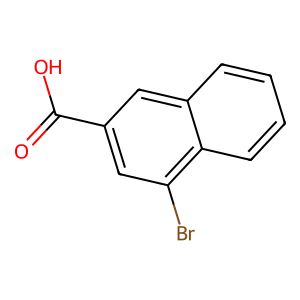

In [9]:
display_2d_structure(inp_smiles)


**Importing the necessary libraries**

In [10]:
%%time

from GNNImplicitSolvent import minimize_mol, calculate_entropy
from rdkit import Chem
from rdkit.Chem import AllChem

mol = Chem.MolFromSmiles(inp_smiles)
mol = Chem.AddHs(mol)
AllChem.EmbedMultipleConfs(mol, numConfs=num_conf_gnnis, useExpTorsionAnglePrefs = False)

minimized_mol, energies = minimize_mol(mol,Solvent)
#entropies, free_energies = calculate_entropy(minimized_mol,Solvent)

/opt/conda/envs/GNNImplicitSolvent/lib/python3.10/site-packages/Simulation/helper_functions.py:1168: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_dict = torch.load(mo

Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC


/opt/conda/envs/GNNImplicitSolvent/lib/python3.10/site-packages/Simulation/Simulator.py:940: UserWarning: Platform not available, defaulting to CPU
  warnings.warn("Platform not available, defaulting to CPU")


Using OpenFF forcefield: openff-2.0.0
using rdkit molecule
setting charges based on AM1BCC
Platform:  GPU  ready
All parallel systems have the same forces as the reference System


100%|██████████| 1/1 [00:11<00:00, 11.51s/it]


CPU times: user 2min 49s, sys: 10 s, total: 2min 59s
Wall time: 27.4 s


In [13]:
import csv
# Convert to kcal/mol
energies_kcal = [e / 4.184 for e in energies]

# Save to CSV
with open('opt_conf_energies_from_gnnis.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['conformer_id', 'energy_in_kcalpermol'])  # Header
    for i, energy in enumerate(energies_kcal):
        writer.writerow([i, energy])

In [14]:
def save_conformers_to_sdf(mol: Chem.Mol, filename: str) -> None:
    """Save a molecule with multiple conformers to an SDF file.

    Args:
        mol (Chem.Mol): The molecule containing multiple conformers.
        filename (str): The name of the output SDF file.
    """
    writer = Chem.SDWriter(filename)
    
    for conf_id in range(mol.GetNumConformers()):
        mol.SetProp("_Name", f"conformer_{conf_id}")
        writer.write(mol, confId=conf_id)
    
    writer.close()

#opt_conf_sdf="optimized_generated_conformers.sdf"
save_conformers_to_sdf(minimized_mol,"conformers_gnnis.sdf")